In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict

In [25]:
data = pd.read_csv('data/water_potability.csv')

In [26]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [28]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [31]:
data.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [30]:
data = data.dropna()

In [32]:
# Разделение на признаки и целевую переменную
X = data.drop('Potability', axis=1)
y = data['Potability']

# Разделение на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Метод 1: Логистическая регрессия
lr = LogisticRegression(max_iter=1000)
lr_predictions = cross_val_predict(lr, X_train, y_train, cv=5)
lr_f1 = f1_score(y_train, lr_predictions)
lr_roc_auc = roc_auc_score(y_train, lr_predictions)
lr_accuracy = accuracy_score(y_train, lr_predictions)
lr_conf_matrix = confusion_matrix(y_train, lr_predictions)
print("Логистическая регрессия:")
print("F-мера:", lr_f1)
print("ROC AUC:", lr_roc_auc)
print("Accuracy:", lr_accuracy)
print("Матрица ошибок:\n", lr_conf_matrix)

# Метод 2: Метод опорных векторов (SVM)
svm = SVC()
svm_predictions = cross_val_predict(svm, X_train, y_train, cv=5)
svm_f1 = f1_score(y_train, svm_predictions)
svm_roc_auc = roc_auc_score(y_train, svm_predictions)
svm_accuracy = accuracy_score(y_train, svm_predictions)
svm_conf_matrix = confusion_matrix(y_train, svm_predictions)
print("\nМетод опорных векторов:")
print("F-мера:", svm_f1)
print("ROC AUC:", svm_roc_auc)
print("Accuracy:", svm_accuracy)
print("Матрица ошибок:\n", svm_conf_matrix)

# Метод 3: K-ближайших соседей
knn = KNeighborsClassifier(algorithm='auto', n_jobs=-1)
knn_predictions = cross_val_predict(knn, X_train, y_train, cv=5)
knn_f1 = f1_score(y_train, knn_predictions)
knn_roc_auc = roc_auc_score(y_train, knn_predictions)
knn_accuracy = accuracy_score(y_train, knn_predictions)
knn_conf_matrix = confusion_matrix(y_train, knn_predictions)
print("\nМетод K-ближайших соседей:")
print("F-мера:", knn_f1)
print("ROC AUC:", knn_roc_auc)
print("Accuracy:", knn_accuracy)
print("Матрица ошибок:\n", knn_conf_matrix)

# Метод 4: Деревья принятия решений
dt = DecisionTreeClassifier()
dt_predictions = cross_val_predict(dt, X_train, y_train, cv=5)
dt_f1 = f1_score(y_train, dt_predictions)
dt_roc_auc = roc_auc_score(y_train, dt_predictions)
dt_accuracy = accuracy_score(y_train, dt_predictions)
dt_conf_matrix = confusion_matrix(y_train, dt_predictions)
print("\nМетод Деревья принятия решений:")
print("F-мера:", dt_f1)
print("ROC AUC:", dt_roc_auc)
print("Accuracy:", dt_accuracy)
print("Матрица ошибок:\n", dt_conf_matrix)

# Метод 5: Случайный лес
rf = RandomForestClassifier()
rf_predictions = cross_val_predict(rf, X_train, y_train, cv=5)
rf_f1 = f1_score(y_train, rf_predictions)
rf_roc_auc = roc_auc_score(y_train, rf_predictions)
rf_accuracy = accuracy_score(y_train, rf_predictions)
rf_conf_matrix = confusion_matrix(y_train, rf_predictions)
print("\nМетод Случайный лес:")
print("F-мера:", rf_f1)
print("ROC AUC:", rf_roc_auc)
print("Accuracy:", rf_accuracy)
print("Матрица ошибок:\n", rf_conf_matrix)

# Метод 6: Бустинг (Gradient Boosting)
gb = GradientBoostingClassifier()
gb_predictions = cross_val_predict(gb, X_train, y_train, cv=5)
gb_f1 = f1_score(y_train, gb_predictions)
gb_roc_auc = roc_auc_score(y_train, gb_predictions)
gb_accuracy = accuracy_score(y_train, gb_predictions)
gb_conf_matrix = confusion_matrix(y_train, gb_predictions)
print("\nМетод Бустинг:")
print("F-мера:", gb_f1)
print("ROC AUC:", gb_roc_auc)
print("Accuracy:", gb_accuracy)
print("Матрица ошибок:\n", gb_conf_matrix)

Логистическая регрессия:
F-мера: 0.012422360248447206
ROC AUC: 0.5026138945818011
Accuracy: 0.6044776119402985
Матрица ошибок:
 [[968   1]
 [635   4]]

Метод опорных векторов:
F-мера: 0.0
ROC AUC: 0.5
Accuracy: 0.6026119402985075
Матрица ошибок:
 [[969   0]
 [639   0]]

Метод K-ближайших соседей:
F-мера: 0.37630662020905925
ROC AUC: 0.5178272940013663
Accuracy: 0.554726368159204
Матрица ошибок:
 [[676 293]
 [423 216]]

Метод Деревья принятия решений:
F-мера: 0.5042145593869731
ROC AUC: 0.5835428809527271
Accuracy: 0.597636815920398
Матрица ошибок:
 [[632 337]
 [310 329]]

Метод Случайный лес:
F-мера: 0.4914744232698095
ROC AUC: 0.6333982567576079
Accuracy: 0.6847014925373134
Матрица ошибок:
 [[856 113]
 [394 245]]

Метод Бустинг:
F-мера: 0.4287138584247258
ROC AUC: 0.5913482269606631
Accuracy: 0.6436567164179104
Матрица ошибок:
 [[820 149]
 [424 215]]


In [44]:
# Выберем лучший метод
best_model = max([
    ("Логистическая регрессия", lr_predictions.mean()),
    ("Метод опорных векторов", svm_predictions.mean()),
    ("K-ближайших соседей", knn_predictions.mean()),
    ("Деревья принятия решений", dt_predictions.mean()),
    ("Случайный лес", rf_predictions.mean()),
    ("Бустинг (Gradient Boosting)", gb_predictions.mean())
], key=lambda x: x[1])

print("Лучший метод:", best_model[0])

# Обучение выбранной модели на всем обучающем наборе
best_model_name = best_model[0]
if best_model_name == "Логистическая регрессия":
    best_model = LogisticRegression(max_iter=1000)
elif best_model_name == "Метод опорных векторов":
    best_model = SVC()
elif best_model_name == "K-ближайших соседей":
    best_model = KNeighborsClassifier()
elif best_model_name == "Деревья принятия решений":
    best_model = DecisionTreeClassifier()
elif best_model_name == "Случайный лес":
    best_model = RandomForestClassifier()
else:
    best_model = GradientBoostingClassifier()

best_model = LogisticRegression(max_iter=1000)

best_model.fit(X_train, y_train)
predictions = best_model.predict(X_test)

# Вывод матрицы ошибок и оценка метрик
conf_matrix = confusion_matrix(y_test, predictions)
print("Матрица ошибок:\n", conf_matrix)
print("Accuracy:", f1_score(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))
print("ROC AUC:", roc_auc_score(y_test, predictions))

Лучший метод: Деревья принятия решений
Матрица ошибок:
 [[231   0]
 [172   0]]
Accuracy: 0.0
Accuracy: 0.5732009925558312
ROC AUC: 0.5


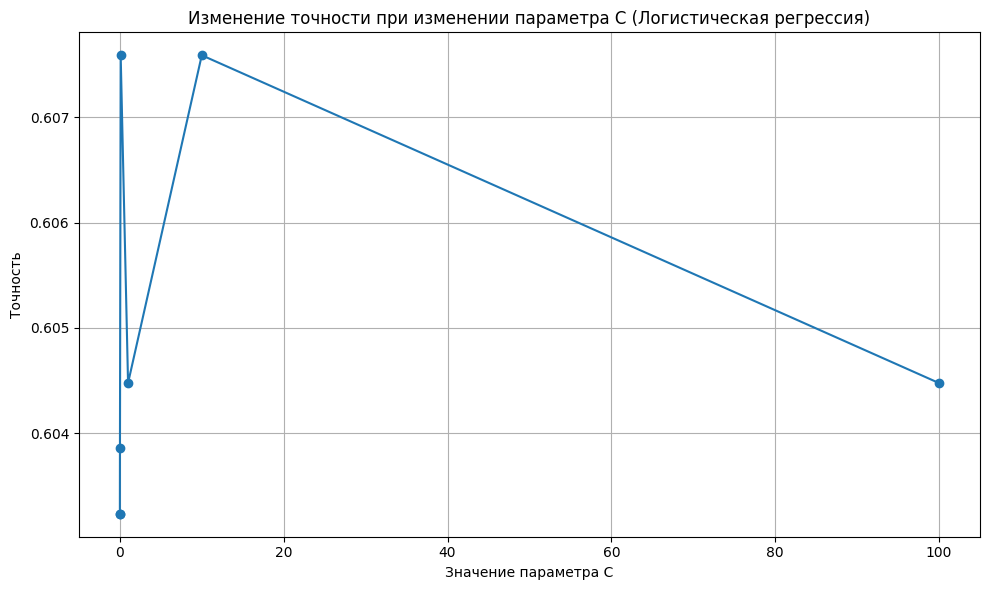

Оптимальный параметр C: 0.1
Точность: 0.6075907973916913


In [54]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Гиперпараметры для Логистической регрессии
lr_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Метод 1: Логистическая регрессия
lr = LogisticRegression(max_iter=10000)
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X_train, y_train)

# Визуализация изменения точности при изменении параметра C
plt.figure(figsize=(10, 6))
plt.plot(lr_params['C'], lr_grid.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Значение параметра C")
plt.ylabel("Точность")
plt.title("Изменение точности при изменении параметра C (Логистическая регрессия)")
plt.grid()
plt.tight_layout()
plt.show()

# Вывод оптимального параметра C и его точности
print("Оптимальный параметр C:", lr_grid.best_params_['C'])
print("Точность:", lr_grid.best_score_)

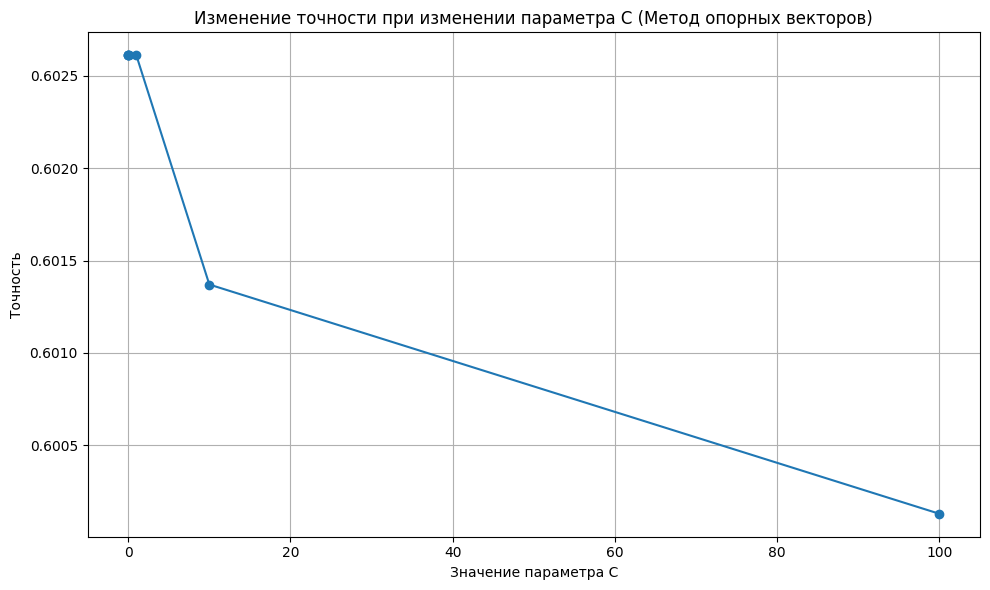

Оптимальный параметр C: 0.0001
Точность: 0.6026121785569164


In [53]:
# Гиперпараметры для Метода опорных векторов
svm_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Метод 2: Метод опорных векторов (SVM)
svm = SVC()
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

# Визуализация изменения точности при изменении параметра C
plt.figure(figsize=(10, 6))
plt.plot(svm_params['C'], svm_grid.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Значение параметра C")
plt.ylabel("Точность")
plt.title("Изменение точности при изменении параметра C (Метод опорных векторов)")
plt.grid()
plt.tight_layout()
plt.show()

# Вывод оптимального параметра C и его точности
print("Оптимальный параметр C:", svm_grid.best_params_['C'])
print("Точность:", svm_grid.best_score_)

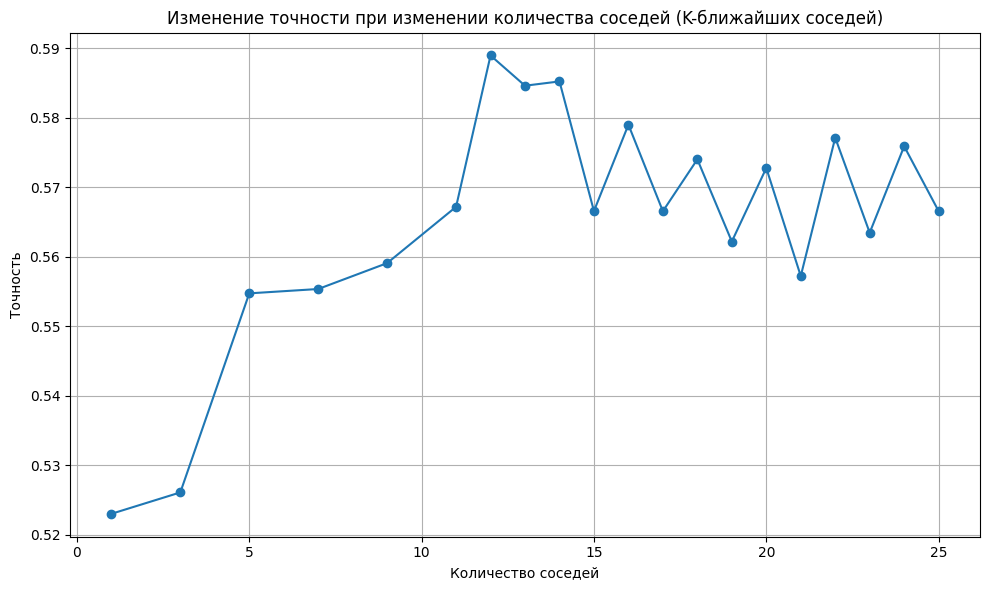

Оптимальное количество соседей: 12
Точность: 0.5889475822836245


In [52]:
# Гиперпараметры для K-ближайших соседей
knn_params = {'n_neighbors': [1, 3, 5, 7, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]}

# Метод 3: K-ближайших соседей
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)

# Визуализация изменения точности при изменении количества соседей
plt.figure(figsize=(10, 6))
plt.plot(knn_params['n_neighbors'], knn_grid.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Количество соседей")
plt.ylabel("Точность")
plt.title("Изменение точности при изменении количества соседей (K-ближайших соседей)")
plt.grid()
plt.tight_layout()
plt.show()

# Вывод оптимального количества соседей и его точности
print("Оптимальное количество соседей:", knn_grid.best_params_['n_neighbors'])
print("Точность:", knn_grid.best_score_)

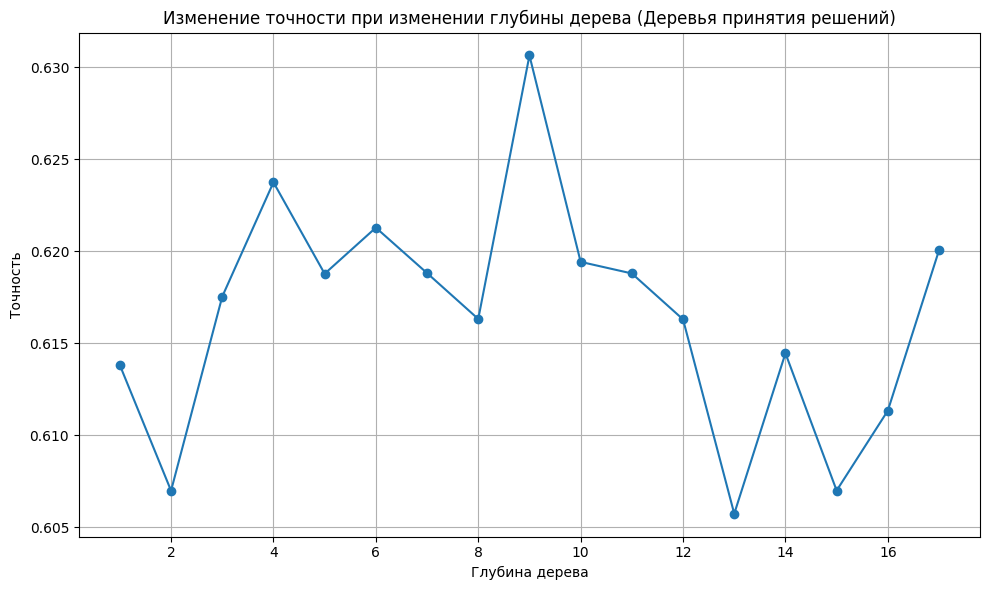

Оптимальная глубина дерева: 9
Точность: 0.6306321472107739


In [39]:
# Гиперпараметры для Деревьев принятия решений
dt_params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]}

# Метод 4: Деревья принятия решений
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy')
dt_grid.fit(X_train, y_train)

# Визуализация изменения точности при изменении глубины дерева
plt.figure(figsize=(10, 6))
plt.plot(dt_params['max_depth'], dt_grid.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Глубина дерева")
plt.ylabel("Точность")
plt.title("Изменение точности при изменении глубины дерева (Деревья принятия решений)")
plt.grid()
plt.tight_layout()
plt.show()

# Вывод оптимальной глубины дерева и его точности
print("Оптимальная глубина дерева:", dt_grid.best_params_['max_depth'])
print("Точность:", dt_grid.best_score_)

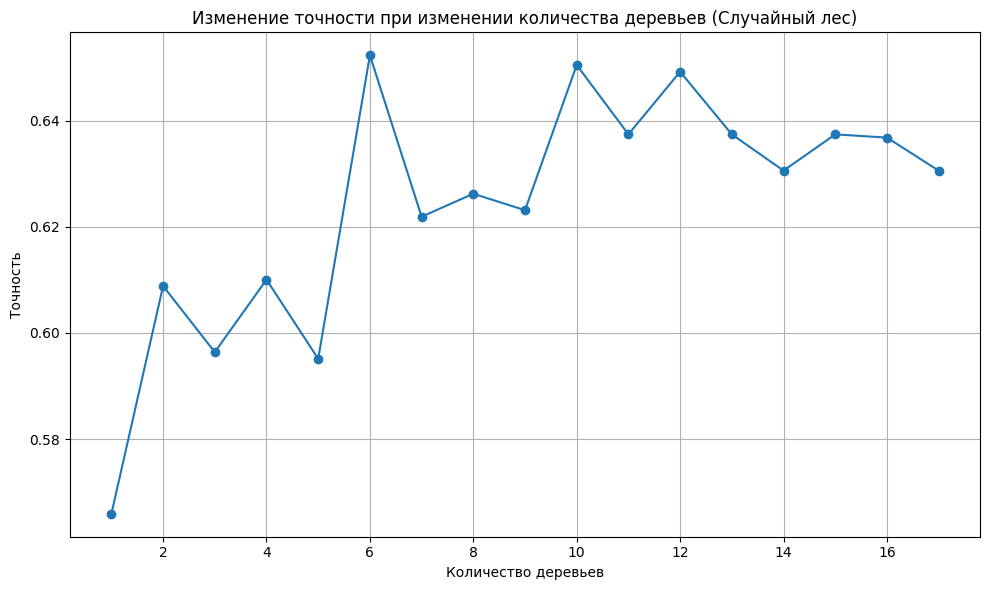

Оптимальное количество деревьев: 6
Точность: 0.6523461233335268


In [41]:
# Гиперпараметры для Случайного леса
rf_params = {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]}

# Метод 5: Случайный лес
rf = RandomForestClassifier()
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Визуализация изменения точности при изменении количества деревьев
plt.figure(figsize=(10, 6))
plt.plot(rf_params['n_estimators'], rf_grid.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Количество деревьев")
plt.ylabel("Точность")
plt.title("Изменение точности при изменении количества деревьев (Случайный лес)")
plt.grid()
plt.tight_layout()
plt.show()

# Вывод оптимального количества деревьев и его точности
print("Оптимальное количество деревьев:", rf_grid.best_params_['n_estimators'])
print("Точность:", rf_grid.best_score_)

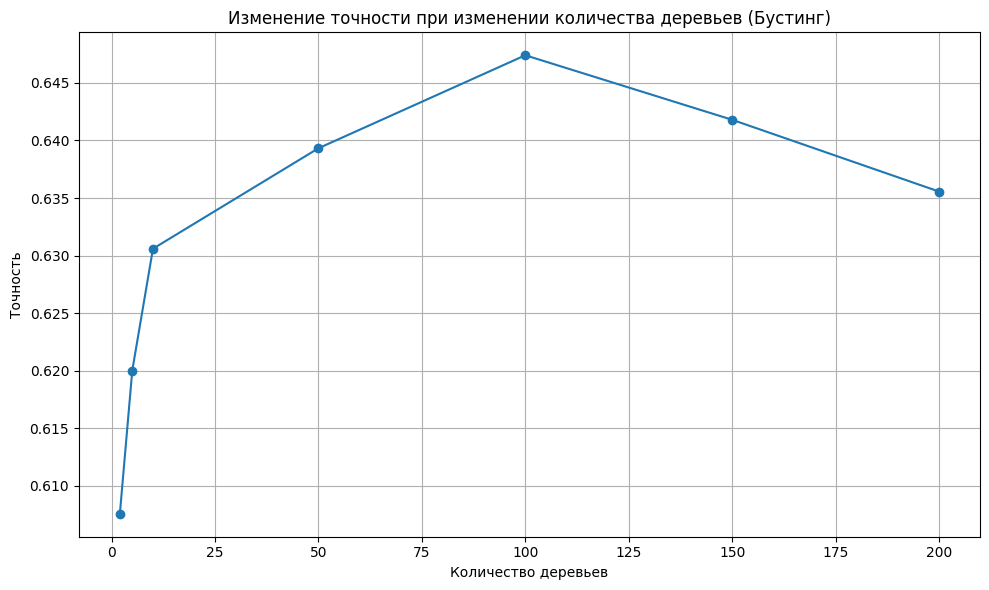

Оптимальное количество деревьев: 100
Точность: 0.6473984636520191


In [42]:
# Гиперпараметры для Бустинга (Gradient Boosting)
gb_params = {'n_estimators': [2, 5, 10, 50, 100, 150, 200]}

# Метод 6: Бустинг (Gradient Boosting)
gb = GradientBoostingClassifier()
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='accuracy')
gb_grid.fit(X_train, y_train)

# Визуализация изменения точности при изменении количества деревьев
plt.figure(figsize=(10, 6))
plt.plot(gb_params['n_estimators'], gb_grid.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Количество деревьев")
plt.ylabel("Точность")
plt.title("Изменение точности при изменении количества деревьев (Бустинг)")
plt.grid()
plt.tight_layout()
plt.show()

# Вывод оптимального количества деревьев и его точности
print("Оптимальное количество деревьев:", gb_grid.best_params_['n_estimators'])
print("Точность:", gb_grid.best_score_)

In [47]:
# вычисление score 5 раз подряд (с различными разделениями каждый раз)

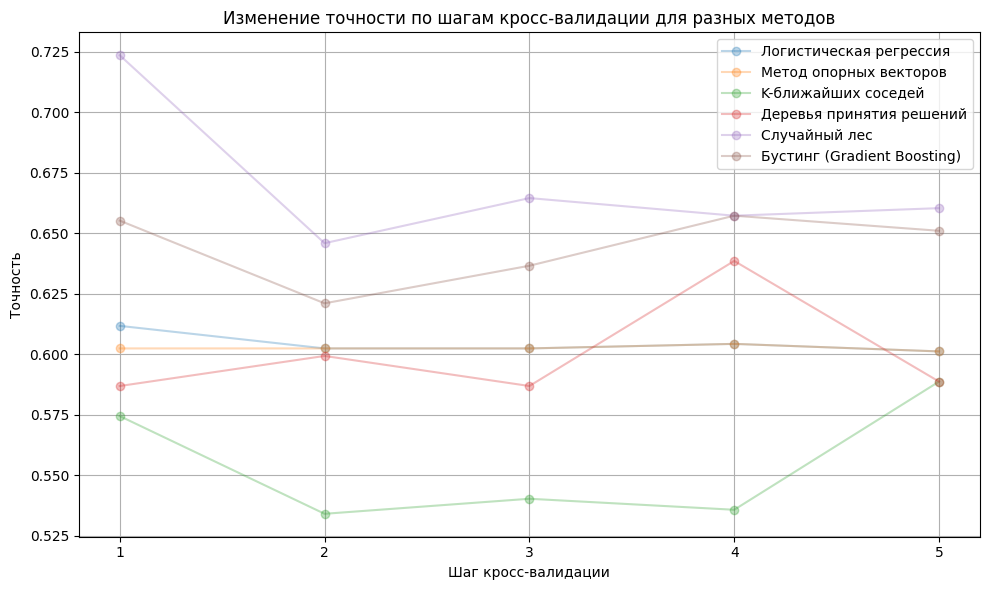

In [43]:
# Метод 1: Логистическая регрессия
lr = LogisticRegression(max_iter=1000)
lr_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')

# Метод 2: Метод опорных векторов (SVM)
svm = SVC()
svm_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')

# Метод 3: K-ближайших соседей
knn = KNeighborsClassifier()
knn_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

# Метод 4: Деревья принятия решений
dt = DecisionTreeClassifier()
dt_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring='accuracy')

# Метод 5: Случайный лес
rf = RandomForestClassifier()
rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Метод 6: Бустинг (Gradient Boosting)
gb = GradientBoostingClassifier()
gb_scores = cross_val_score(gb, X_train, y_train, cv=5, scoring='accuracy')

# Визуализация изменения точности по шагам кросс-валидации для каждого метода
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 6), lr_scores, marker='o', label='Логистическая регрессия', alpha=0.3)
plt.plot(np.arange(1, 6), svm_scores, marker='o', label='Метод опорных векторов', alpha=0.3)
plt.plot(np.arange(1, 6), knn_scores, marker='o', label='K-ближайших соседей', alpha=0.3)
plt.plot(np.arange(1, 6), dt_scores, marker='o', label='Деревья принятия решений', alpha=0.3)
plt.plot(np.arange(1, 6), rf_scores, marker='o', label='Случайный лес', alpha=0.3)
plt.plot(np.arange(1, 6), gb_scores, marker='o', label='Бустинг (Gradient Boosting)', alpha=0.3)
plt.xlabel("Шаг кросс-валидации")
plt.ylabel("Точность")
plt.title("Изменение точности по шагам кросс-валидации для разных методов")
plt.xticks(np.arange(1, 6))
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [49]:
print("LogisticRegression Accuracy: %0.2f (+/- %0.2f)" % (lr_scores.mean(), lr_scores.std()))
print("SVM Accuracy: %0.2f (+/- %0.2f)" % (svm_scores.mean(), svm_scores.std()))
print("KNeighborsClassifier Accuracy: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std()))
print("DecisionTreeClassifier Accuracy: %0.2f (+/- %0.2f)" % (dt_scores.mean(), dt_scores.std()))
print("RandomForestClassifier Accuracy: %0.2f (+/- %0.2f)" % (rf_scores.mean(), rf_scores.std()))
print("GradientBoostingClassifier Accuracy: %0.2f (+/- %0.2f)" % (gb_scores.mean(), gb_scores.std()))

LogisticRegression Accuracy: 0.60 (+/- 0.00)
SVM Accuracy: 0.60 (+/- 0.00)
KNeighborsClassifier Accuracy: 0.55 (+/- 0.02)
DecisionTreeClassifier Accuracy: 0.60 (+/- 0.02)
RandomForestClassifier Accuracy: 0.67 (+/- 0.03)
GradientBoostingClassifier Accuracy: 0.64 (+/- 0.01)
